In [1]:
import kooplearn
import kooplearn.datasets
import matplotlib.pyplot as plt


In [2]:
import logging
import math
from pathlib import Path
from typing import Optional

import numpy as np
import scipy
import scipy.sparse
from scipy.integrate import romb
from scipy.special import binom
from scipy.stats.sampling import NumericalInversePolynomial

from kooplearn._src.utils import topk
from kooplearn.datasets.misc import (
    DataGenerator,
    DiscreteTimeDynamics,
    LinalgDecomposition,
)

from kooplearn.datasets.stochastic import LangevinTripleWell1D


In [3]:
langevin = LangevinTripleWell1D(rng_seed=0,gamma=2,dt=1e-4)

In [4]:
sample = langevin.sample(0, 500_000)

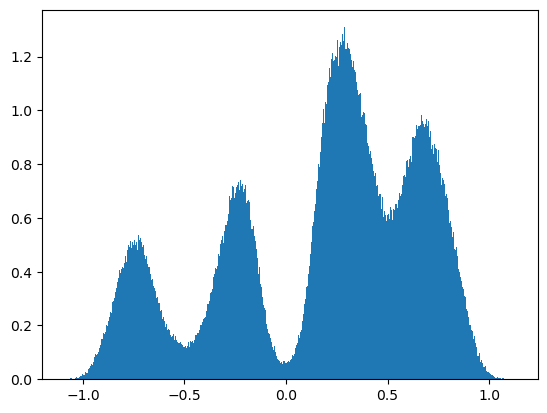

In [5]:
plt.hist(sample, bins=500, density=True);

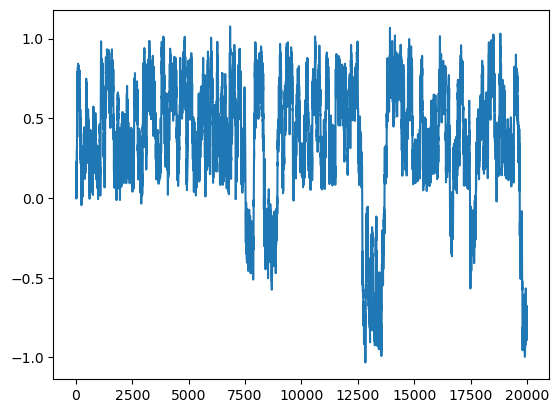

In [6]:
plt.plot(sample[:20000])


In [7]:
from sklearn.gaussian_process.kernels import RBF
from kooplearn.data import traj_to_contexts
from kooplearn.nn.data  import ContextsDataset
import torch
torch.cuda.empty_cache()
test=sample[:2_000_000:20]

forces = langevin.force_fn(test)
print(forces.shape)
train_data = np.zeros((test.shape[0],2,test.shape[1]))
train_data[:,0,...] = test
train_data[:,1,...] = forces/0.1
#train_data = traj_to_contexts(test)
sample_dataset = ContextsDataset(torch.tensor(train_data,requires_grad=True,dtype=torch.float32))
#forces_dataset = traj_to_contexts_dataset(torch.tensor(forces_train,requires_grad=True))


(25001, 1)


In [14]:
from kooplearn.models.feature_maps.dp_gen import DPGen
from lightning.pytorch import Trainer
from torch.utils.data import DataLoader
from kooplearn.models.feature_maps import DPNet
class MLP(torch.nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = torch.nn.Sequential(
      torch.nn.Flatten(),
      torch.nn.Linear(1, 8),
      torch.nn.ReLU(),
      torch.nn.Linear(8, 32),
      torch.nn.ReLU(),
      torch.nn.Linear(32, 16),
      torch.nn.ReLU(),
      torch.nn.Linear(16, 10)
    )


  def forward(self, x):
        # Check if the input tensor has a batch dimension
      if len(x.shape) == 1:
           # If not, add a batch dimension
          x = x.unsqueeze(0)
      return self.layers(x)
  
model= MLP()


optimizer_kwargs = {"lr":0.001}
optimizer = torch.optim. Adam
trainer = Trainer(max_epochs=500)
train_dataloader = DataLoader(sample_dataset, batch_size=4096, shuffle=False)
dpgen = DPGen(MLP,optimizer,trainer,optimizer_kwargs=optimizer_kwargs,friction=2/0.1)
dpgen.fit(train_dataloaders=train_dataloader)

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name    | Type | Params
---------------------------------
0 | encoder | MLP  | 1.0 K 
---------------------------------
1.0 K     Trainable params
0         Non-trainable params
1.0 K     Total params
0.004     Total estimated model params size (MB)


Fitting DPGen. Lookback window length set to 1


/home/tdevergne@iit.local/anaconda3/envs/kooplearn-dev/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=63` in the `DataLoader` to improve performance.
/home/tdevergne@iit.local/anaconda3/envs/kooplearn-dev/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (7) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


`Trainer.fit` stopped: `max_epochs=500` reached.


In [20]:
from kooplearn.models.gen_edmd import GenExtendedDMD
from kooplearn.models.edmd import ExtendedDMD
model = GenExtendedDMD(feature_map=dpgen,reduced_rank=False, rank=6
                                   
                                   , tikhonov_reg=1e-5
                                   )

In [21]:
model.fit(train_data)

The numerical rank of the result (3) is smaller than the desired rank (6).
 3 degrees of freedom will be ignored.


Fitted GenExtendedDMD model. Lookback length set to 1


In [22]:
vals_gen,vecs_gen = model.eig(eval_right_on=train_data[:,:1, ...])

In [23]:
vals_gen

array([-17.04393432+0.j,   0.        +0.j,   0.        +0.j,
         0.        +0.j,   0.74573382+0.j,  12.46828185+0.j])

(array([], dtype=int64),)


IndexError: index -7 is out of bounds for axis 1 with size 6

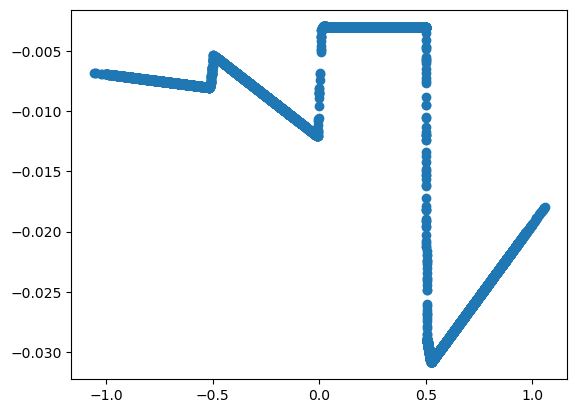

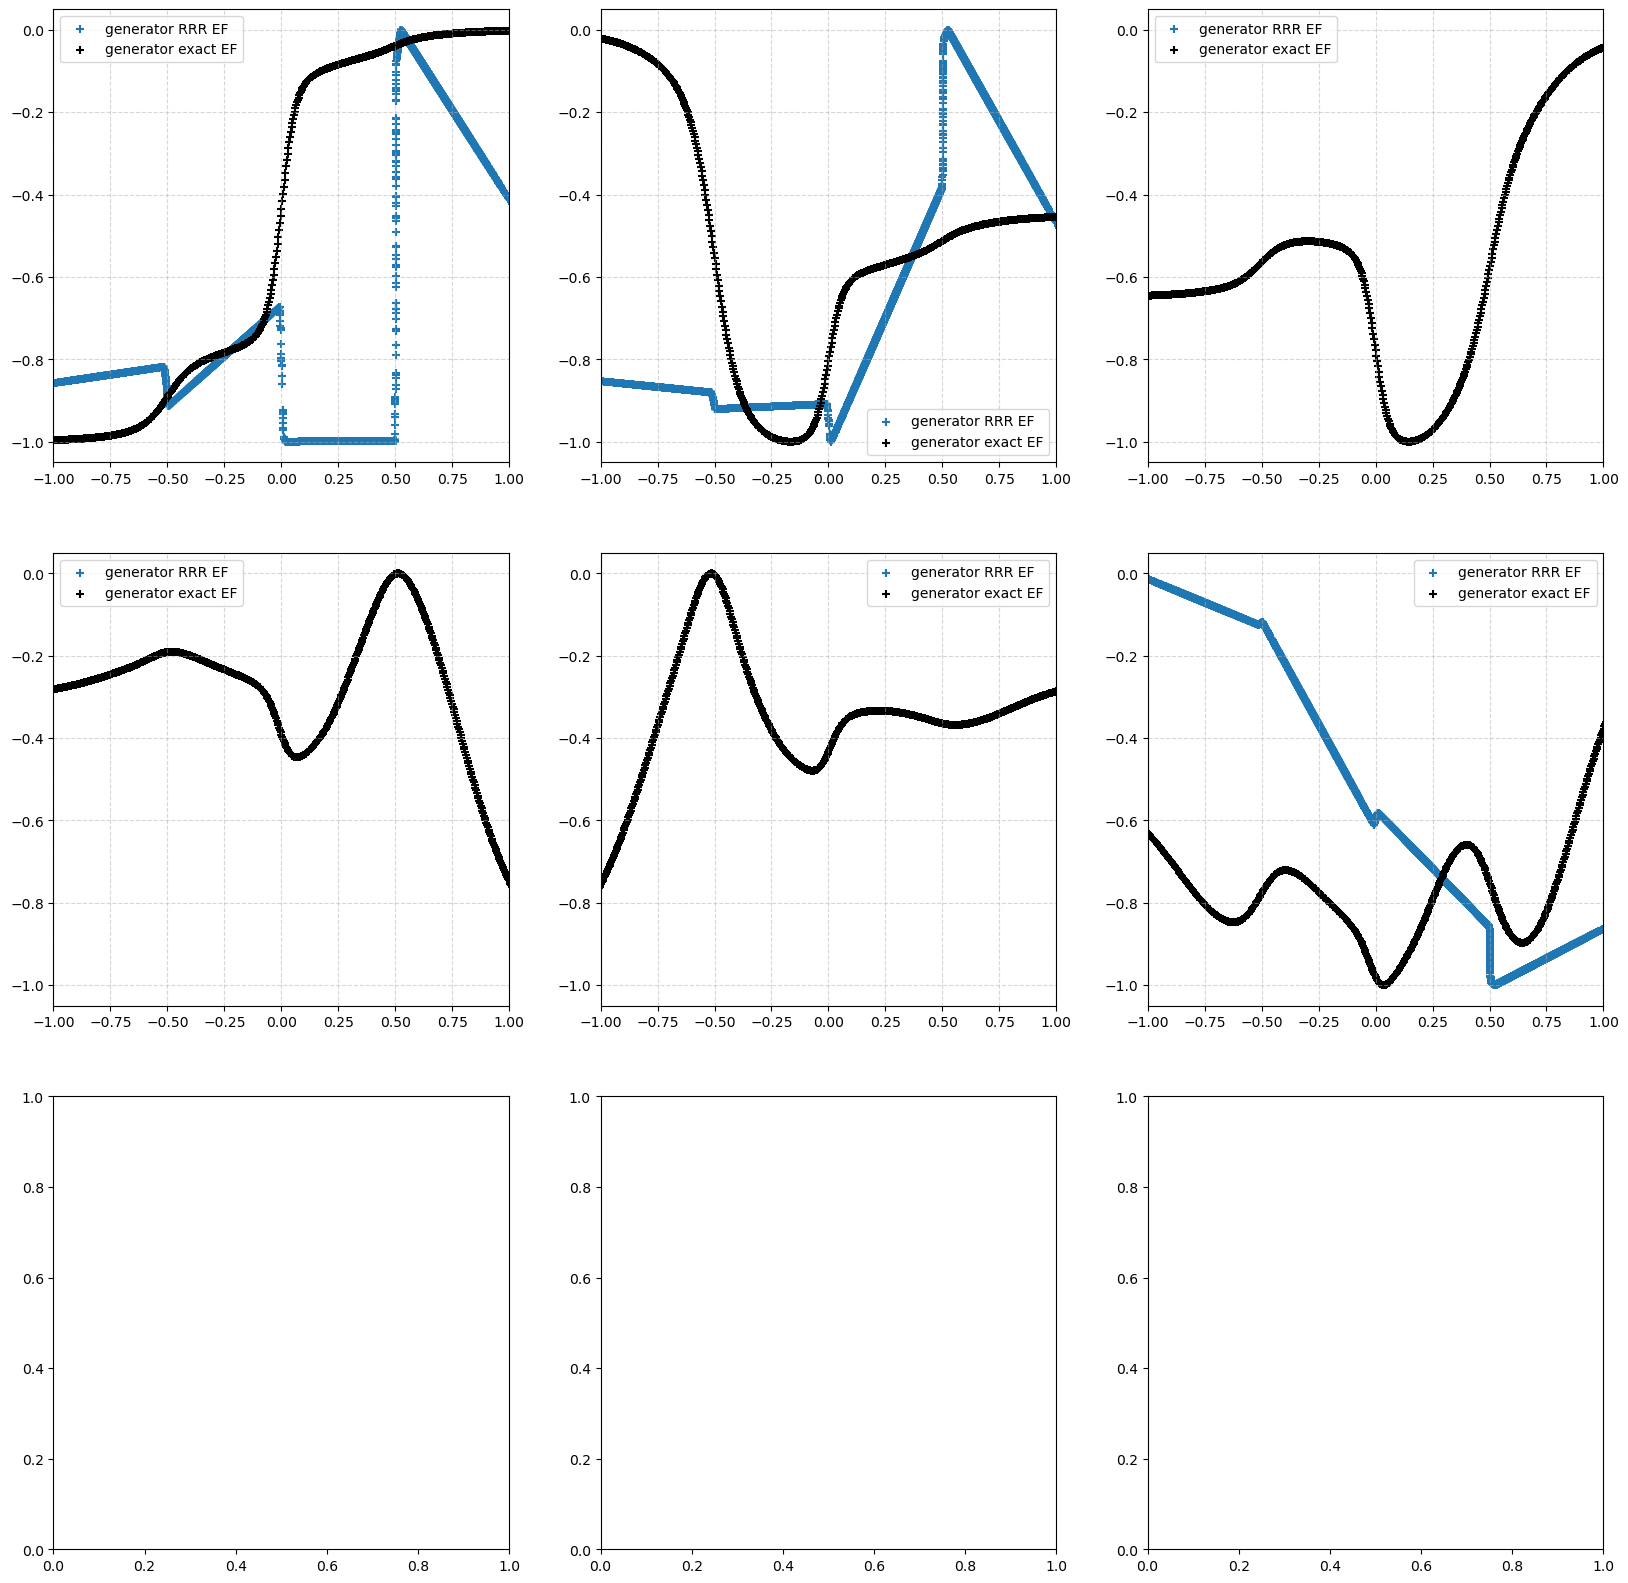

In [24]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt




solutions =np.load("/home/tdevergne@iit.local/Documents/eigenfunctions.np",allow_pickle=True)
x_values  =np.load("/home/tdevergne@iit.local/Documents/centers.np",allow_pickle=True)
plt.scatter(np.squeeze(train_data[:,:1, ...]),vecs_gen[:,-1],label="PCR generator first eigenfunction")
#plt.scatter(np.squeeze(train_data[:,:1, ...]), vecs[:,-2],label="PCR transfer first eigenfunction")
#plt.plot(decomp.x[values],-funcs[values,2],label="exact eigenfunction",color="r")

plt.plot()
num = 3
fig, axes = plt.subplots(num, num, figsize=(20, 20))
#values = np.where(np.logical_and(decomp.x>-1,decomp.x<1))[0]
print(np.where(vecs_gen[:,-1]==0))

new_0 = -(vecs_gen[:,-1]-vecs_gen[:,-1].min())/(vecs_gen[:,-1].min()-vecs_gen[:,-1].max())

for i in range(50):
    #vecs_gen[:,-i-1] /= vecs_gen[:,-1]
    #vecs_gen[:,-i-1] /= vecs_gen[:,-1]
    new = (vecs_gen[:,-i-1]-vecs_gen[:,-i-1].min())/(vecs_gen[:,-i-1].min()-vecs_gen[:,-i-1].max())
    new_sol = (solutions[:,i+1]-solutions[:,i+1].min())/(solutions[:,i+1].min()-solutions[:,i+1].max())
    if  i==2:
        axes[i//num, i%num].scatter(np.squeeze(train_data[:,:1, ...]), -new-1, marker="+", color='C0',label="generator RRR EF")
    else:
        axes[i//num, i%num].scatter(np.squeeze(train_data[:,:1, ...]), new, marker="+", color='C0',label="generator RRR EF")
    axes[i//num, i%num].scatter(x_values,new_sol, marker="+", color='k', label="generator exact EF")
    #axes[i//num, i%num].scatter(np.squeeze(train_data[:,:1, ...]),new_vecs, marker="+", color='k', label="generator exact EF")
    axes[i//num, i%num].grid(True, linestyle='--', alpha=.5)
    axes[i//num, i%num].set_xlim(-1, 1)
    #axes[i//num, i%num].set_ylim(y_min, y_max)

    axes[i//num, i%num].legend()

plt.xlabel('x')
#plt.ylabel('')
plt.legend()
plt.show()

###### 